Please, leave your contact details (Telegram/Discord) in the summary section of the peer-review 'sheet' so 
that I can contact you to clarify my potential mistakes

In [2]:
import sys
!{sys.executable} -m pip install mwparserfromhell

     |████████████████████████████████| 176 kB 14.1 MB/s            


In [3]:
import requests
import json
import mwparserfromhell
import re
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Steps
# a) retrieve an article
# b) extract the meaningful portion of the article
# c) clean the extracted portion
# d) build a frequency model based on it
# e) analyze the article based on a model


def get_content(article_name):
    #url = "https://en.wikipedia.org/w/api.php?action=query&format=json&prop=revisions&titles=Ozone_layer&formatversion=2&rvprop=content&rvslots=*"
    url_base = "https://en.wikipedia.org/w/api.php"
    parameters = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": article_name,
        "formatversion": 2,
        "rvprop": "content",
        "rvslots": '*'
    }
    response = requests.get(url_base, params=parameters)
    return response.json()

In [5]:
content_dict = get_content("Ozone_layer")
print(json.dumps(content_dict,indent=2))

{
  "batchcomplete": true,
  "query": {
    "normalized": [
      {
        "fromencoded": false,
        "from": "Ozone_layer",
        "to": "Ozone layer"
      }
    ],
    "pages": [
      {
        "pageid": 22834,
        "ns": 0,
        "title": "Ozone layer",
        "revisions": [
          {
            "slots": {
              "main": {
                "contentmodel": "wikitext",
                "contentformat": "text/x-wiki",
                "content": "{{short description|Region of Earth's stratosphere that absorbs most of the Sun's ultraviolet radiation}}\n{{pp-semi-indef}}\n[[File:Ozone cycle.svg|thumb|upright=1.5|[[Ozone-oxygen cycle]] in the ozone layer.]]\n\nThe '''ozone layer''' or '''ozone shield''' is a region of [[Earth]]'s [[stratosphere]] that absorbs most of the [[Sun]]'s [[ultraviolet]]  radiation. It contains a high concentration of [[ozone]] (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the 

In [6]:
def merge_contents(data):
    dict_pages = data["query"]["pages"][0]
    article_name = dict_pages["title"]
    wikitext_content = dict_pages["revisions"][0]["slots"]["main"]["content"]
    parsed_content = mwparserfromhell.parse(wikitext_content)
    raw_text = parsed_content.strip_code()
    title_and_content = [article_name, raw_text]
    return title_and_content

In [7]:
title_and_content = merge_contents(content_dict)
print(title_and_content)

['Ozone layer', 'thumb|upright=1.5|Ozone-oxygen cycle in the ozone layer.\n\nThe ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately  above Earth, although its thickness varies seasonally and geographically.\n\nThe ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range o

In [8]:
def tokenize(title_and_content):
    content = title_and_content[1]
    splitter_chars = ['\n', ' ', '\t', '(', ')', ',', ';', '.', '"']
    allowed_chars = ["'", "-"]
    #words = re.findall(r"")
    #traverse through the string and tokenize the words
    words_list = []
    string = ""
    for char in content:
        if char not in splitter_chars and (char.isalpha() or char.isdigit()
                                           or char in allowed_chars):
            string += char
        else:
            if string:
                words_list.append(string)
                string = ""

    return words_list

In [9]:
def lower_collection(word_list):
    return list(map(str.lower, word_list))

In [10]:
collection = tokenize(title_and_content)
collection = lower_collection(collection)
print(collection)

['thumb', 'upright', '1', '5', 'ozone-oxygen', 'cycle', 'in', 'the', 'ozone', 'layer', 'the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', "earth's", 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', "sun's", 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', "earth's", 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 

In [11]:
def count_frequency(collection):
    frequencies = dict()
    for word in collection:
        if word in frequencies:
            frequencies[word] += 1
        else:
            frequencies[word] = 1
    return frequencies

In [12]:
def print_most_frequent(frequencies, n):
    frequencies_list = list(frequencies.items())
    frequency_order = sorted(frequencies_list,
                             key=lambda tuple: tuple[1],
                             reverse=True)
    print(*(frequency_order[:n]), sep="\n")

In [13]:
frequencies = count_frequency(collection)
print_most_frequent(frequencies, 10)

('the', 217)
('of', 104)
('ozone', 97)
('and', 80)
('in', 72)
('to', 64)
('is', 42)
('a', 33)
('layer', 30)
('by', 30)


In [14]:
def remove_stop_words(words, stop_words):
    return list(filter(lambda word: word not in stop_words, words))

In [15]:
def visualize_in_hist(frequencies, num_words):

    frequencies_list = list(frequencies.items())
    frequency_order = sorted(frequencies_list,
                             key=lambda tuple: tuple[1],
                             reverse=True)
    most_common_words = [pair[0] for pair in frequency_order][:num_words]
    most_common_freqs = [pair[1] for pair in frequency_order][:num_words]

    label_positions = np.arange(len(most_common_words),0,-1)
    #frequency_boundaries = np.arange(0, max(most_common_freqs)+10, 5)
    width = 1
    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    
    ax.set_yticks(label_positions)
    ax.set_yticklabels(most_common_words)
    #ax.set_xticks(frequency_boundaries)
    ax.set_xbound(0,max(most_common_freqs)+10)
    plt.barh(label_positions,
             most_common_freqs,
             width,
             color='#AEDBCE',
             edgecolor='black')
    plt.show()

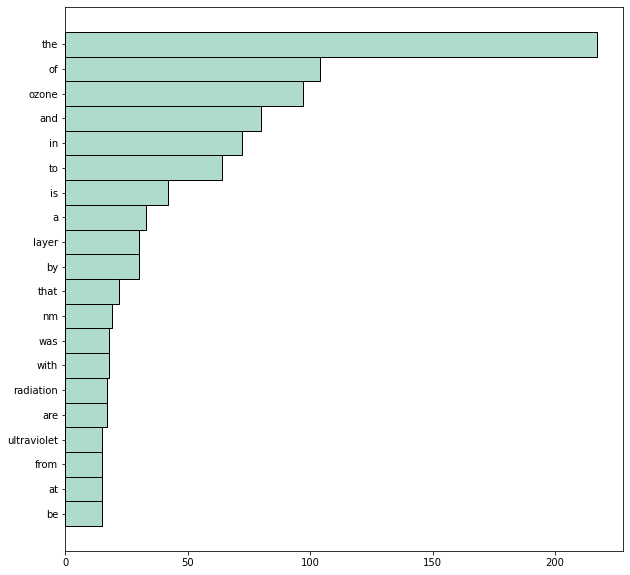

In [16]:
visualize_in_hist(frequencies, 20)
#taken from https://www.semrush.com/blog/seo-stop-words/
stop_words = '''a
about
above
actually
after
again
against
all
almost
also
although
always
am
an
and
any
are
as
at
be
became
become
because
been
before
being
below
between
both
but
by
can
could
did
do
does
doing
down
during
each
either
else
few
for
from
further
had
has
have
having
he
he'd
he'll
hence
he's
her
here
here's
hers
herself
him
himself
his
how
how's
I
I'd
I'll
I'm
I've
if
in
into
is
it
it's
its
itself
just
let's
may
maybe
me
might
mine
more
most
must
my
myself
neither
nor
not
of
oh
on
once
only
ok
or
other
ought
our
ours
ourselves
out
over
own
same
she
she'd
she'll
she's
should
so
some
such
than
that
that's
the
their
theirs
them
themselves
then
there
there's
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
very
was
we
we'd
we'll
we're
we've
were
what
what's
when
whenever
when's
where
whereas
wherever
where's
whether
which
while
who
whoever
who's
whose
whom
why
why's
will
with
within
would
yes
yet
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves'''.split("\n")




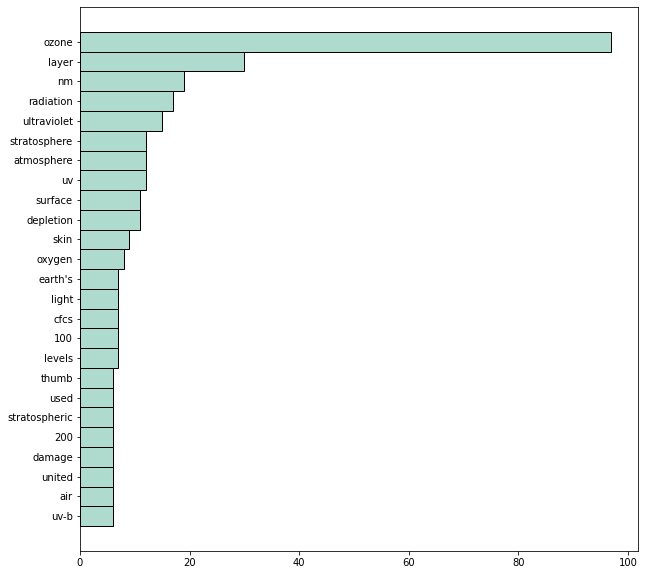

In [17]:
filtered_collection = remove_stop_words(collection, stop_words)
filtered_frequencies = count_frequency(filtered_collection)
visualize_in_hist(filtered_frequencies, 25)

Please, don't forget to leave your contact details in your summary (telegram, discord, and such)!